# The OECD Crop Yield Data #

The OECD [produces annual estimates](https://data.oecd.org/agroutput/crop-production.htm) of crop yields per acre for several key staple crops in participating countries.  These measures are described as:

*Crop production depends on the availability of arable land and is affected in particular by yields, macroeconomic uncertainty, as well as consumption patterns; it also has a great incidence on agricultural commodities' prices. The importance of crop production is related to harvested areas, returns per hectare (yields) and quantities produced. Crop yields are the harvested production per unit of harvested area for crop products. In most of the cases yield data are not recorded, but are obtained by dividing the production data by the data on area harvested. The actual yield that is captured on farm depends on several factors such as the crop's genetic potential, the amount of sunlight, water and nutrients absorbed by the crop, the presence of weeds and pests. This indicator is presented for wheat, maize, rice and soybean. Crop production is measured in tonnes per hectare, in thousand hectares and thousand tonnes.*

I've made a copy of this dataset available at [my github page](https://github.com/aleahy-work/CS-STAT323-W24).  Your task is to import this data into a (well-formatted, cleaned up) Jupyter noteobok and use it to produce some information about crop yields.  

**Problems:**

1. What years and what grains are described by the dataset?  (Note: Future years are projections.)

2. Produce a histogram of the distribution of the 'Value' column in the year 1990.
   
+ Use Matplotlib's 'pyplot.hist'. Make sure your histogram has both axes labelled as well as a title. 
+ Note that pandas has it's own histogram function. Do some research and product a plot with it.  How does it compare to the other histogram plot? (Hint: probably not very different.)

3. The plot you produced in the previous question had some significant outliers which probably require some explanation.  Here's one idea:

+ What are the units in the 'MEASURE' column?
+ Produce a frequency distribution of the different measures in this column--that is, how many times does each meaure occur in the colum?  (Hint: the 'value_counts()' function for pandas might be helpful.)
+ Given the observations in the previous bullet points, what do you think the phrase "Crop production is measured in tonnes per hectare, in thousand hectares and thousand tonnes" in the explanation quoted above means?
+ Given that we are interested in 'yields per acre', produce a new dataset (for all years, grains, and countries) more appropriate for our study.

4. Use the dataset from the previous problem to produce a *boxplot* of the crop yield of rice in tons per hectare for all countries in the year 2020. Label it well! 

5. What was the highest crop yield for rice per acre in 2020?  What country obtained those yields?

6. Produce a comparative boxplot comparing the crop yield per acre for each of the four crops in the study in the United States over the entire length of the study.  Labels!

# Key #

## Problem 1 ##

In [1]:
import pandas as pd

In [3]:
mydata = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/cropyields.csv")

In [3]:
mydata.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.315,NaN
1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.395,NaN
2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094,NaN
3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336,NaN
4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.538,NaN


In [4]:
mydata["TIME"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

In [5]:
mydata["SUBJECT"].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

**Answer:** The years covered are 1990 - 2030 and the grains are rice, wheat, maize, and soybeam. 

## Problem 2 ##

In [6]:
import matplotlib.pyplot as plt

In [7]:
mydata2 = mydata[(mydata["TIME"] == 1990) & (mydata["SUBJECT"] == 'RICE')]

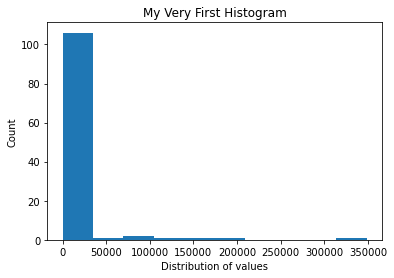

In [11]:
plt.hist(mydata2["Value"])
plt.xlabel("Distribution of values")
plt.ylabel("Count")
plt.title("My Very First Histogram")
plt.show()

<AxesSubplot: >

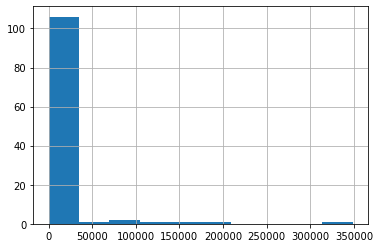

In [13]:
mydata2["Value"].hist()

## Problem 3 ##

In [26]:
mydata['MEASURE'].unique()

array(['TONNE_HA', 'THND_TONNE', 'THND_HA'], dtype=object)

In [14]:
mydata['MEASURE'].value_counts()

THND_TONNE    6232
THND_HA       6232
TONNE_HA      6212
Name: MEASURE, dtype: int64

The 'MEASURE' column contains three different quantities: (1) the productivity (TONNE_HA = tons per hectare), (2) the number of hectares (THND_HA), and (3) the number of tonnes of grain (THND_TONNE). We are only interested in yields per hectare, so we can filter by 'TONNE_HA'.

In [15]:
mydata3 = mydata[mydata['MEASURE'] == 'TONNE_HA']

## Problem 4 ##

In [17]:
mydata4 = mydata3[(mydata3["TIME"] == 2020) & (mydata3["SUBJECT"] == 'RICE')]

In [18]:
mydata4.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
30,AUS,CROPYIELD,RICE,TONNE_HA,A,2020,8.305,NaN
112,CAN,CROPYIELD,RICE,TONNE_HA,A,2020,0.000,NaN
194,JPN,CROPYIELD,RICE,TONNE_HA,A,2020,5.032,NaN
276,KOR,CROPYIELD,RICE,TONNE_HA,A,2020,5.474,NaN
358,MEX,CROPYIELD,RICE,TONNE_HA,A,2020,6.682,NaN


In [21]:
mydata4["Value"].head()

30     8.305
112    0.000
194    5.032
276    5.474
358    6.682
Name: Value, dtype: float64

In [22]:
rice2020 = mydata4["Value"]

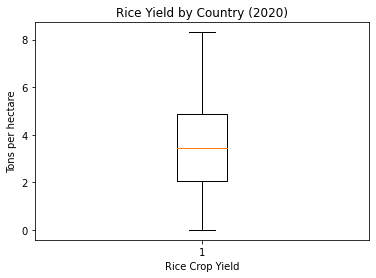

In [26]:
plt.boxplot(rice2020)
plt.xlabel("Rice Crop Yield")
plt.ylabel("Tons per hectare")
plt.title("Rice Yield by Country (2020)")
plt.show()

## Problem 5 ##

In [29]:
mydata4["Value"].max()

8.305

The maximum rice yield per acre in 2020 was 8.305 tons per hectare. 

In [30]:
mydata4[mydata4['Value'] > 8.3]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
30,AUS,CROPYIELD,RICE,TONNE_HA,A,2020,8.305,NaN


These yields were obtained by Australia. 

## Problem 6 ##

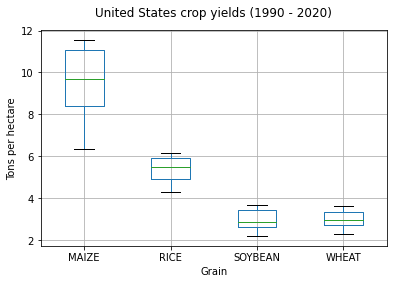

In [43]:
mydata3[mydata3["LOCATION"] == 'USA'].boxplot(column="Value", by="SUBJECT")
plt.xlabel("Grain")
plt.ylabel("Tons per hectare")
plt.suptitle("United States crop yields (1990 - 2020)")
plt.title("")
plt.show()